In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv('train1.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296209 entries, 0 to 296208
Data columns (total 67 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              296209 non-null  int64  
 1   ps_ind_02_cat   296084 non-null  float64
 2   ps_ind_04_cat   296164 non-null  float64
 3   ps_ind_05_cat   293294 non-null  float64
 4   ps_car_01_cat   296152 non-null  float64
 5   ps_car_02_cat   296206 non-null  float64
 6   ps_car_03_cat   91620 non-null   float64
 7   ps_car_04_cat   296209 non-null  int64  
 8   ps_car_05_cat   163922 non-null  float64
 9   ps_car_06_cat   296209 non-null  int64  
 10  ps_car_07_cat   290426 non-null  float64
 11  ps_car_08_cat   296209 non-null  int64  
 12  ps_car_09_cat   295921 non-null  float64
 13  ps_car_10_cat   296209 non-null  int64  
 14  ps_car_11_cat   296209 non-null  int64  
 15  ps_ind_01       296209 non-null  int64  
 16  ps_ind_03       296209 non-null  int64  
 17  ps_ind_06_

,id,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,...,ps_calc_20_bin,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
0,1158448,1.0,1.0,0.0,7.0,1.0,1.0,0,1.0,10,...,0,0,4.136926,3,0.777766,25,0.165477,3.010493,16,0
1,341018,2.0,1.0,0.0,7.0,1.0,NaN,0,NaN,11,...,0,0,0.592341,3,0.770527,1,0.592340,3.036803,16,0
2,699143,2.0,0.0,0.0,4.0,1.0,NaN,0,1.0,1,...,0,0,0.950207,6,0.757445,4,0.237552,2.536030,16,0
3,744070,1.0,1.0,0.0,3.0,1.0,NaN,2,NaN,1,...,1,0,2.013771,5,NaN,4,0.503442,3.251724,15,0
4,639390,2.0,0.0,0.0,11.0,1.0,NaN,2,NaN,11,...,0,0,0.000000,3,0.767450,0,793360.881100,2.703617,18,1


In [7]:
data.shape

(296209, 67)

In [3]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=27857   #this test is 'validation' set and my erp is 27857 (karam)
)


In [9]:
print(f"Target distribution:\n{y.value_counts()}")

Target distribution:
target
0    281023
1     15186
Name: count, dtype: int64


In [7]:
from sklearn.impute import SimpleImputer
"""
binary_cols = [col for col in X_train.columns if X_train[col].dropna().nunique() == 2]
other_cols = [col for col in X_train.columns if col not in binary_cols]

# Imputer for binary columns
binary_imputer = SimpleImputer(strategy='most_frequent')
X_train[binary_cols] = binary_imputer.fit_transform(X_train[binary_cols])
X_test[binary_cols] = binary_imputer.transform(X_test[binary_cols])

# Imputer for other numeric columns
num_imputer = SimpleImputer(strategy='mean')
X_train[other_cols] = num_imputer.fit_transform(X_train[other_cols])
X_test[other_cols] = num_imputer.transform(X_test[other_cols])
"""

bin_cols = [c for c in X_train.columns if '_bin' in c]
cat_cols = [c for c in X_train.columns if '_cat' in c]
num_cols = [c for c in X_train.columns if c not in bin_cols + cat_cols]

# Fill categorical NaNs with -1 (extra category for 'missing')
X_train[cat_cols] = X_train[cat_cols].fillna(-1)
X_test[cat_cols] = X_test[cat_cols].fillna(-1)

# Fill numeric NaNs with median from training data
median_vals = X_train[num_cols].median()
X_train[num_cols] = X_train[num_cols].fillna(median_vals)
X_test[num_cols] = X_test[num_cols].fillna(median_vals)

# fill binary columns with mode
imputer_bin = SimpleImputer(strategy='most_frequent')
X_train[bin_cols] = imputer_bin.fit_transform(X_train[bin_cols])
X_test[bin_cols] = imputer_bin.transform(X_test[bin_cols])



In [9]:
print("Binary cols:", len(bin_cols))
print("Categorical cols:", len(cat_cols))
print("Numeric cols:", len(num_cols))

print("Binary Columns ({}):".format(len(bin_cols)), bin_cols, "\n")
print("Categorical Columns ({}):".format(len(cat_cols)), cat_cols, "\n")
print("Numeric Columns ({}):".format(len(num_cols)), num_cols)


Binary cols: 17
Categorical cols: 14
Numeric cols: 35
Binary Columns (17): ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'] 

Categorical Columns (14): ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'] 

Numeric Columns (35): ['id', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_cal

In [10]:
X_train.isna().sum().sum(), X_test.isna().sum().sum() #no more Na columns


(0, 0)

In [17]:
#baseline TREE AUROC
model = DecisionTreeClassifier(random_state=27857)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1]
baseline_auroc = roc_auc_score(y_test, y_pred)

print("Baseline AUROC:", baseline_auroc)


Baseline AUROC: 0.5096418109189851


In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top k features
anova_selector = SelectKBest(score_func=f_classif, k=11)
anova_selector.fit(X_train, y_train)

selected_features = X_train.columns[anova_selector.get_support()]

print("Top 10 selected features (ANOVA):")
print(selected_features)

# Train model on selected features only
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

model_fs = DecisionTreeClassifier(random_state=27857)
model_fs.fit(X_train_sel, y_train)

y_pred = model_fs.predict_proba(X_test_sel)[:, 1]
auroc_fs = roc_auc_score(y_test, y_pred)

print("AUROC after feature selection:", auroc_fs)

C:\Users\SHEIKHANI LAPTOP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [58] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\SHEIKHANI LAPTOP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Top 10 selected features (ANOVA):
Index(['ps_ind_05_cat', 'ps_car_02_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_17_bin', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'feature2', 'feature4'],
      dtype='object')
AUROC after feature selection: 0.5094391929741722


In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

base_model = DecisionTreeClassifier(random_state=27857)

# Forward Selection (start empty, add features that improve AUROC)
sfs_forward = SFS(
    base_model,
    k_features=10,
    forward=True,
    floating=False,
    scoring='roc_auc',
    cv=5,
    n_jobs=1
)
sfs_forward = sfs_forward.fit(X_train, y_train)

selected_forward = list(sfs_forward.k_feature_names_)
print("Forward selection features:", selected_forward)

# Evaluate
X_train_sfs = X_train[selected_forward]
X_test_sfs = X_test[selected_forward]

model_sfs = DecisionTreeClassifier(random_state=27857)
model_sfs.fit(X_train_sfs, y_train)

y_pred = model_sfs.predict_proba(X_test_sfs)[:, 1]
auroc_sfs = roc_auc_score(y_test, y_pred)

print("AUROC after forward selection:", auroc_sfs)


Forward selection features: ['ps_car_04_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_ind_06_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_13_bin', 'ps_ind_17_bin', 'feature1']
AUROC after forward selection: 0.5775532766858615


In [30]:
from sklearn.feature_selection import chi2

print("Number of binary columns:", len(binary_cols))
print("Number of continuous columns:", len(other_cols))

# --- ANOVA for continuous features ---
anova_selector = SelectKBest(score_func=f_classif, k=min(11, len(other_cols)))
anova_selector.fit(X_train[other_cols], y_train)
selected_cont = np.array(other_cols)[anova_selector.get_support()]

# --- Chi-Square for binary features ---
# Note: chi2 requires non-negative inputs; binary 0/1 values are fine
chi_selector = SelectKBest(score_func=chi2, k=min(11, len(binary_cols)))
chi_selector.fit(X_train[binary_cols], y_train)
selected_bin = np.array(binary_cols)[chi_selector.get_support()]

# --- Combine both sets ---
selected_features = list(selected_cont) + list(selected_bin)

print("\nSelected continuous features (ANOVA):")
print(selected_cont)
print("\nSelected binary features (Chi-Square):")
print(selected_bin)
print("\nCombined selected features:")
print(selected_features)

# --- Train model on selected features only ---
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

model_fs = DecisionTreeClassifier(random_state=27857)
model_fs.fit(X_train_sel, y_train)

y_pred = model_fs.predict_proba(X_test_sel)[:, 1]
auroc_fs = roc_auc_score(y_test, y_pred)

print("\nAUROC after ANOVA + Chi-Square feature selection:", auroc_fs)

Number of binary columns: 23
Number of continuous columns: 43


C:\Users\SHEIKHANI LAPTOP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\SHEIKHANI LAPTOP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Selected continuous features (ANOVA):
['ps_ind_05_cat' 'ps_car_04_cat' 'ps_ind_15' 'ps_reg_01' 'ps_reg_02'
 'ps_reg_03' 'ps_car_12' 'ps_car_13' 'ps_car_15' 'feature2' 'feature4']

Selected binary features (Chi-Square):
['ps_ind_04_cat' 'ps_car_02_cat' 'ps_car_05_cat' 'ps_car_08_cat'
 'ps_ind_06_bin' 'ps_ind_07_bin' 'ps_ind_08_bin' 'ps_ind_09_bin'
 'ps_ind_12_bin' 'ps_ind_16_bin' 'ps_ind_17_bin']

Combined selected features:
['ps_ind_05_cat', 'ps_car_04_cat', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_15', 'feature2', 'feature4', 'ps_ind_04_cat', 'ps_car_02_cat', 'ps_car_05_cat', 'ps_car_08_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_12_bin', 'ps_ind_16_bin', 'ps_ind_17_bin']

AUROC after ANOVA + Chi-Square feature selection: 0.5105460930973837


Final AUROC (best hyperparameters, before PCA): 0.6039

Top 10 Important Features:
ps_car_13        0.373772
ps_ind_05_cat    0.205962
ps_ind_17_bin    0.125699
ps_reg_02        0.058553
ps_ind_06_bin    0.056487
ps_reg_01        0.051169
ps_ind_15        0.051068
feature4         0.022923
ps_reg_03        0.019902
feature2         0.015397
dtype: float64


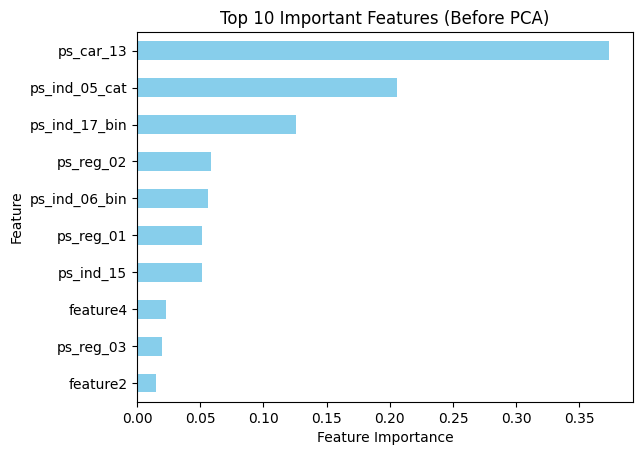

In [6]:
# === Final Feature Importance Analysis (Before PCA) ===
import matplotlib.pyplot as plt

# Your final selected features
selected_features = [
    'ps_ind_05_cat', 'ps_car_04_cat', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
    'ps_car_12', 'ps_car_13', 'ps_car_15', 'feature2', 'feature4',
    'ps_ind_04_cat', 'ps_car_02_cat', 'ps_car_05_cat', 'ps_car_08_cat',
    'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
    'ps_ind_12_bin', 'ps_ind_16_bin', 'ps_ind_17_bin'
]

# Subset your data
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# Use your best hyperparameters (replace values with your GridSearchCV results)
best_params = {
    'criterion': 'entropy',        
    'max_depth': 5,                
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': None,
    'random_state': 27857
}

# Train final model
final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train_sel, y_train)

# Evaluate model
y_pred = final_tree.predict_proba(X_test_sel)[:, 1]
final_auroc = roc_auc_score(y_test, y_pred)
print(f"Final AUROC (best hyperparameters, before PCA): {final_auroc:.4f}")

# Extract feature importances
importances = final_tree.feature_importances_
feat_imp = pd.Series(importances, index=selected_features).sort_values(ascending=False)

# Show top 10 important features
print("\nTop 10 Important Features:")
print(feat_imp.head(10))

# Plot
feat_imp.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features (Before PCA)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


In [31]:
base_model = DecisionTreeClassifier(random_state=27857)

# Backward Selection
sfs_backward = SFS(
    base_model,
    k_features=11,
    forward=False,
    floating=False,
    scoring='roc_auc',
    cv=3, #reduced due to time issue 
    n_jobs=1
)
sfs_backward = sfs_backward.fit(X_train_sel, y_train)

selected_backward = list(sfs_backward.k_feature_names_)
print("Backward selection features:", selected_backward)

# Evaluate
X_train_sfs = X_train_sel[selected_backward]
X_test_sfs = X_test_sel[selected_backward]

model_sfs = DecisionTreeClassifier(random_state=27857)
model_sfs.fit(X_train_sfs, y_train)

y_pred = model_sfs.predict_proba(X_test_sfs)[:, 1]
auroc_sfs = roc_auc_score(y_test, y_pred)

print("AUROC after backward selection:", auroc_sfs)


Backward selection features: ['ps_ind_05_cat', 'ps_car_04_cat', 'ps_ind_15', 'ps_reg_03', 'ps_car_13', 'feature2', 'feature4', 'ps_ind_04_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_17_bin']
AUROC after backward selection: 0.510248374888376


Number of components capturing 90% variance: 11


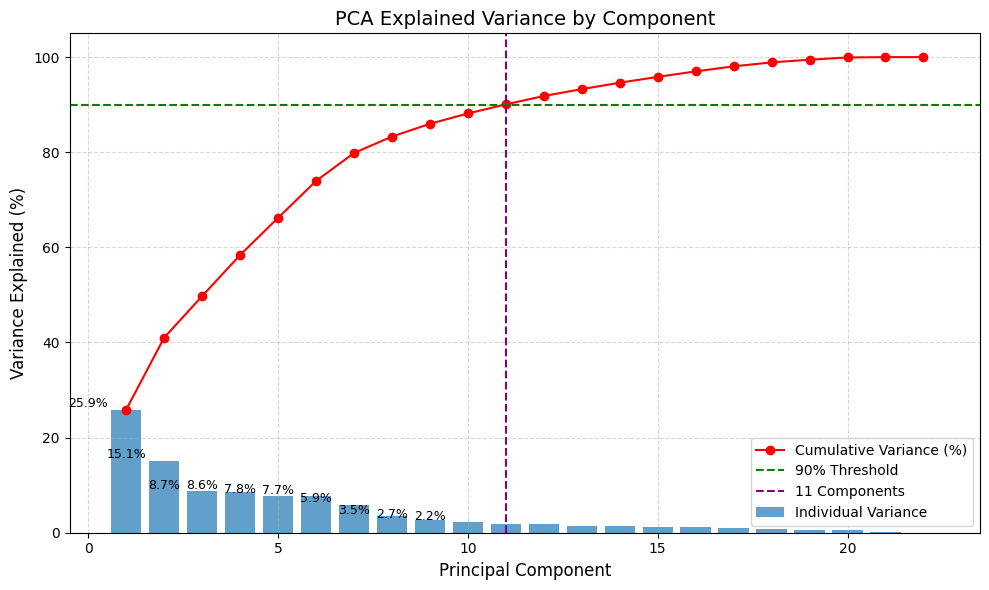

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt


# Scale numeric only — on the actual data, not column names
scaler = ColumnTransformer([
    ('num', StandardScaler(), selected_cont),  # continuous columns to scale
    ('bin', 'passthrough', selected_bin)       # binary columns left as-is
])

# Fit on the training data (DataFrame)
X_scaled = scaler.fit_transform(X_train[list(selected_cont) + list(selected_bin)])

# Apply PCA
pca = PCA().fit(X_scaled)

cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cum_var >= 0.90) + 1

print(f"Number of components capturing 90% variance: {n_components}")

# Explained variance ratios
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)


# --- Create DataFrame for easier plotting ---
pca_df = pd.DataFrame({
    'Component': range(1, len(explained_var) + 1),
    'Explained Variance (%)': explained_var * 100,
    'Cumulative Variance (%)': cum_var * 100
})

# --- Plot the variance curves ---
plt.figure(figsize=(10,6))
plt.bar(pca_df['Component'], pca_df['Explained Variance (%)'], 
        alpha=0.7, label='Individual Variance')
plt.plot(pca_df['Component'], pca_df['Cumulative Variance (%)'], 
         marker='o', color='red', label='Cumulative Variance (%)')

# Highlight the 90% mark
plt.axhline(90, color='green', linestyle='--', label='90% Threshold')
plt.axvline(n_components, color='purple', linestyle='--', label=f'{n_components} Components')

# --- Annotate top few components with their percentage ---
for i in range(min(10, len(pca_df))):  # annotate first 10 for clarity
    plt.text(i, explained_var[i]*100 + 0.5, f"{explained_var[i]*100:.1f}%", ha='center', fontsize=9, rotation=0)

# --- Style the plot ---
plt.title('PCA Explained Variance by Component', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Variance Explained (%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV

# --- Use your transformed training data ---
# If you did PCA:
# X_train_final = pca.transform(X_scaled)
# Otherwise, just use X_scaled

X_train_final = pca.transform(X_scaled)  # replace if not using PCA
y_train_final = y_train

# --- Define the model ---
dt = DecisionTreeClassifier(random_state=27857)

# --- Define hyperparameter grid ---
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

# --- Grid Search with 5-fold cross-validation ---
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='roc_auc',   # since we used AUROC above
    cv=5,
    n_jobs=1,
    verbose=2
)

grid_search.fit(X_train_final, y_train_final)

# --- Best parameters and score ---
print("\n🔍 Best Hyperparameters:")
print(grid_search.best_params_)

print("\n🏆 Best CV AUROC:", grid_search.best_score_)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   4.6s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   5.1s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   4.9s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   5.5s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   5.5s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   5.0s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   4.9s
[CV] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   4.9s
